In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print(f'Number of available GPU: {len(physical_device)}')

try:
    tf.config.experimental.set_memory_growth(physical_device[0], True)
except:
    print('No GPU detected')

Number of available GPU: 1


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"X_train data shape: {X_train.shape}")
print(f"y_train data shape: {y_train.shape}")
print(f"X_test data shape: {X_test.shape}")
print(f"y_test data shape: {y_test.shape}")

X_train data shape: (60000, 28, 28)
y_train data shape: (60000,)
X_test data shape: (10000, 28, 28)
y_test data shape: (10000,)


In [4]:
X_train_norm = X_train.astype('float32')
X_test_norm = X_test.astype('float32')

X_train_norm = X_train_norm / 255
X_test_norm = X_test_norm / 255

X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], 28, 28, 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], 28, 28, 1))

y_train_one = tf.keras.utils.to_categorical(y_train) 
y_test_one = tf.keras.utils.to_categorical(y_test)

In [5]:
print(f"X_train data shape: {X_train_norm.shape}")
print(f"y_train data shape: {y_train_one.shape}")
print(f"X_test data shape: {X_test_norm.shape}")
print(f"y_test data shape: {y_test_one.shape}")

X_train data shape: (60000, 28, 28, 1)
y_train data shape: (60000, 10)
X_test data shape: (10000, 28, 28, 1)
y_test data shape: (10000, 10)


In [6]:
def createModelCNN():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(y_train_one[0].shape[0], activation='softmax'))
    
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(optimizer=opt, 
                      loss='categorical_crossentropy', 
                          metrics=['accuracy'])
    return model

In [7]:
model_cnn = createModelCNN()
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [8]:
history = model_cnn.fit(X_train_norm, y_train_one, 
                           epochs=10, batch_size=64,
                               validation_data=(X_test_norm, y_test_one), verbose=1)

Epoch 1/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2063 - accuracy: 0.9343 - val_loss: 0.0551 - val_accuracy: 0.9821
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0712 - accuracy: 0.9776 - val_loss: 0.0383 - val_accuracy: 0.9872
Epoch 3/10
938/938 [==============================] - 14s 15ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0301 - val_accuracy: 0.9898
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0314 - val_accuracy: 0.9904
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0274 - val_accuracy: 0.9913
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0278 - val_accuracy:

<AxesSubplot:xlabel='Epochs', ylabel='Accuracy'>

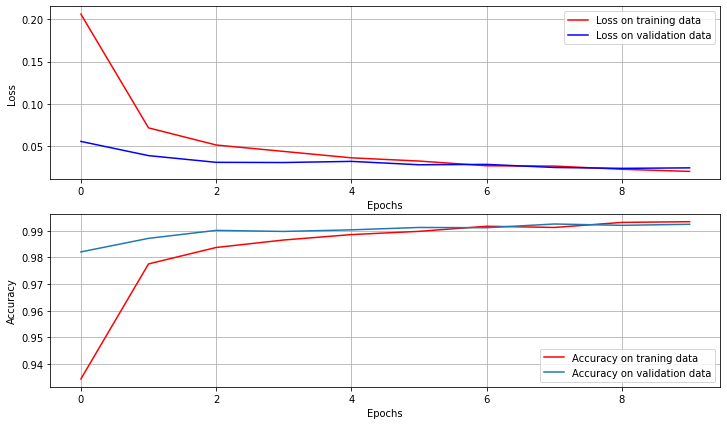

In [45]:
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(211)
ax1.grid(True)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
sns.lineplot(x=np.arange(0, 10, 1), y=history.history['loss'], ax=ax1, color='red', label='Loss on training data')
sns.lineplot(x=np.arange(0, 10, 1), y=history.history['val_loss'], ax=ax1, color='blue', label='Loss on validation data')

ax2 = fig.add_subplot(212)
ax2.grid(True)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
sns.lineplot(x=np.arange(0, 10, 1), y=history.history['accuracy'], ax=ax2, color='red', label='Accuracy on traning data')
sns.lineplot(x=np.arange(0, 10, 1), y=history.history['val_accuracy'], ax=ax2, label='Accuracy on validation data')

In [53]:
loss, acc = model_cnn.evaluate(x=X_test_norm, y=y_test_one)
print(f'Model accuracy on test data: {round(acc, 3) * 100}%')
print(f'Model loss on test data: {round(loss, 4)}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0237 - accuracy: 0.9925
Model accuracy on test data: 99.3%
Model loss on test data: 0.023711159825325012
